In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Szeged*, Hungary Weather

This notebook is gonna walk through an analysis of weather data from Szeged*, Hungary.  The analysis will lead up to a linear regression model that predicts temperature.

<sub>*(according to every submitted pronunciation [here](https://forvo.com/word/szeged/), the city is pronounced kinda like 'sehged')</sub>

### But first!  Warm up 🥵

* Q: How does the ROC curve differ in binary and multi-class classification?
  * A: \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
  
* Bonus warm-up 🥵!

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

# Gen data
n = 5000
y = np.random.choice([0, 1, 2], n)
x1 = np.random.normal(10, 5, n)
x2 = np.random.normal(5, 3, n)

# Shift xs by class to make more easily separable
x1[np.where(y == 0)] += 5
x1[np.where(y == 1)] -= 5
x2[np.where(y == 0)] += 5
x2[np.where(y == 2)] -= 5

df = pd.DataFrame({"x1": x2, "x2": x1, "y": y})
df.head()

,x1,x2,y
0,2.983200,5.995096,2
1,9.197455,22.532109,0
2,3.585781,3.842656,2
3,-5.037402,16.537421,2
4,14.810440,9.503859,0


<IPython.core.display.Javascript object>

In [3]:
df["y"].value_counts(normalize=True)

0    0.3476
1    0.3280
2    0.3244
Name: y, dtype: float64

<IPython.core.display.Javascript object>

* Plot `x1` by `x2` and color by `y`

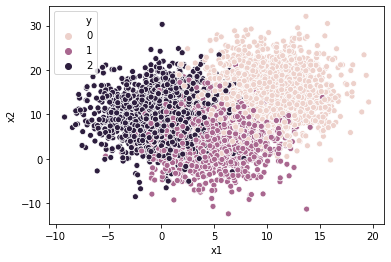

<IPython.core.display.Javascript object>

In [4]:
sns.scatterplot("x1", "x2", hue="y", data=df)
plt.show()

* Perform a train/test split with 20% of the data in test set

In [5]:
X = df[["x1", "x2"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [6]:
y_test.value_counts(normalize=True)

0    0.352
1    0.327
2    0.321
Name: y, dtype: float64

<IPython.core.display.Javascript object>

* Fit a logistic regression model (use whatever hyperparameters you'd like)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

* Score your model and report fitting issues (i.e. under/over)

In [8]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score {train_score}")
print(f"test_score {test_score}")

train_score 0.816
test_score 0.834


<IPython.core.display.Javascript object>

* Display a confusion matrix and a classification report.
  * When classifying an actual class 0, what mistake is the model most likely to make?
  * What 2 classes are the hardest to separate? Does this make sense based on the scatter plot?
  * What class has the highest recall? What does that mean? Does this make sense based on the scatter plot?

In [9]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["tru_0", "tru_1", "tru_2"], columns=["pred_0", "pred_1", "pred_2"]
)
# Covnvert to percent of total test set
# cm_df /= y_test.size
display(cm_df)

print(classification_report(y_test, y_pred))

,pred_0,pred_1,pred_2
tru_0,318,29,5
tru_1,34,242,51
tru_2,10,37,274


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       352
           1       0.79      0.74      0.76       327
           2       0.83      0.85      0.84       321

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



<IPython.core.display.Javascript object>

## Really general EDA

We'll start with loading the data and doing some intro EDA.  Just things like `shape`, `head`, `isnull`, etc....

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# CSV downloaded from https://www.kaggle.com/budincsevity/szeged-weather
data_url = "https://docs.google.com/spreadsheets/d/1VI1rDsUI7KTMUEyDgV8cc0gLdwYr1p_aCwyyp3Mz3_M/export?format=csv"
szeged = pd.read_csv(data_url)
szeged.shape

(96453, 12)

<IPython.core.display.Javascript object>

In [11]:
szeged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null int64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


<IPython.core.display.Javascript object>

In [12]:
szeged.isna().mean().sort_values(ascending=False).head()

Precip Type             0.00536
Daily Summary           0.00000
Pressure (millibars)    0.00000
Loud Cover              0.00000
Visibility (km)         0.00000
dtype: float64

<IPython.core.display.Javascript object>

...Let's go on a tangent investigating these `NA`s!

### Tangent start

*click here to jump to [Tangent end](#Tangent-end)*

My guess going in would be that a lack of precipitation would appear as an `NA` here, but that's a suspiciously low percentage for a lack of precipitation.  I will concede, I'm not familiar with Hungary's weather, maybe it does rain there 99.5% of the time.

We could:
  * Drop them.. It's a low percentage of our records, but maybe there's value to be had?
  * look at the data's documenation (should probably start here... but we won't...)
  * look at the `value_counts` of the `Precip Type` column.
  * look at the other column values when `Precip Type` is `NA`
  * Look at a `crosstab` of `Precip Type` and a column like `Summary`

Show the value counts of the `Precip Type` column, use an argument to avoid excluding NaN from this output

In [13]:
szeged["Precip Type"].value_counts(normalize=True, dropna=False)

rain    0.883581
snow    0.111059
NaN     0.005360
Name: Precip Type, dtype: float64

<IPython.core.display.Javascript object>

Show the head of the data when `Precip Type` is NaN

In [14]:
precip_filter = szeged["Precip Type"].isna()
szeged[~precip_filter].head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


<IPython.core.display.Javascript object>

Look at a `crosstab` of `Precip Type` and a column like `Summary`

In [15]:
szeged_copy = szeged.copy()
szeged_copy.loc[szeged_copy["Precip Type"].isna(), "Precip Type"] = "NaN"

pd.crosstab(szeged_copy["Summary"], szeged_copy["Precip Type"], dropna=False)

Precip Type,NaN,rain,snow
Summary,,,
Breezy,0,42,12
Breezy and Dry,0,1,0
Breezy and Foggy,0,8,27
Breezy and Mostly Cloudy,0,490,26
Breezy and Overcast,0,472,56
Breezy and Partly Cloudy,0,379,7
Clear,127,9371,1392
Dangerously Windy and Partly Cloudy,0,1,0
Drizzle,0,39,0


<IPython.core.display.Javascript object>

A higher percentage of `NaN`s seem to be associated with clear weather than rain or snow.  It feels safe to conclude there's some relationship between `NaN`s and lack of precipitation.  We can confirm this by checking the documentation.  If we check the [Kaggle page](https://www.kaggle.com/budincsevity/szeged-weather) where this data was downloaded from, we see that this data was originally collected from the [darksky.net](https://darksky.net/) API.  Conveniently, this API has [some documentation](https://darksky.net/dev/docs#data-point-object) on all the values it can return.  The below is copied from the documentation about our `Precip Type` column.  So we see that if the `precipIntensity` is zero, we are expected to have a `NaN`.

> **`precipType`** *optional*
>
> The type of precipitation occurring at the given time. If defined, this property will have one of the following values: `"rain"`, `"snow"`, or `"sleet"` (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If `precipIntensity` is zero, then this property will not be defined. Additionally, due to the lack of data in our sources, historical `precipType` information is usually estimated, rather than observed.)

### Tangent end

Okie doke. Let's get down to brass tacks.  We want to predict temperature.  To do this we'll just use the `Humidity` and `Visibility (km)` features.  We can start to focus our EDA on these culprits.

Subset the dataframe to only the temp (C), humidity, and visibility columns.

In [16]:
szeged = szeged[["Temperature (C)", "Humidity", "Visibility (km)"]]
szeged.head()

,Temperature (C),Humidity,Visibility (km)
0,9.472222,0.89,15.8263
1,9.355556,0.86,15.8263
2,9.377778,0.89,14.9569
3,8.288889,0.83,15.8263
4,8.755556,0.83,15.8263


<IPython.core.display.Javascript object>

Create a pairplot/scatter matrix of all three remaining columns. Do we see some correlations?

In [ ]:
pd.plotting.scatter_matrix(szeged, figsize=(10, 10))
# sns.pairplot(szeged)
plt.show()

Create a heatmap of the correlations between these three columns.

In [ ]:
sns.heatmap(szeged.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

We seem to have some predictive power within these two inputs.  Looking at the scatterplots we can see trends, and a heatmap confirms some correlation.  `Humidity` is more tightly coupled with `Temperature (C)` than `Visibility (km)`.

Perform a train test split; pick whatever parameters you want

In [ ]:
X = szeged.drop(columns=["Temperature (C)"])
y = szeged["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

Fit a linear regression model using `sklearn`

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

Score the model and report fitting issues (i.e. under/over)

In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"train_score {train_score}")
print(f"test_score {test_score}")

Our model's formula can be found in the `intercept_` and `coef_` attributes.  The trailing underscore is a convention in `sklearn` to mean the model's `fit` method will define them (i.e. we our model can't have coefficients until the model is fit, so they're stored in a trailing `_` attribute).

In [ ]:
print(model.intercept_)
print(model.coef_)

Use string interpolation/formating to print out a string version of our linear regression model's formula
  * i.e. this might look like `Temp = 100 + (20) * Humidity + (2) * Visibility`


What does this formula tell us?

In [ ]:
X_train.columns

In [ ]:
print(
    f"Temp = {model.intercept_:.2f} + ({model.coef_[0]:.2f}) * Humidity + ({model.coef_[1]:.2f}) * Visibility"
)

Use the model object's predict method to make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Create a dataframe with the input features, `y_test`, and the predictions for the test set

In [ ]:
pred_df = X_test.copy()
pred_df["actual"] = y_test
pred_df["predictions"] = y_pred
pred_df.head()

Let's look at a plot of our predictions vs our predictors.

Make a scatter plot with Humidity on the x axis and model predictions as the y axis 

In [ ]:
sns.scatterplot("Humidity", "predictions", data=pred_df)
plt.show()

Make a scatter plot with Visibility on the x axis and model predictions as the y axis

In [ ]:
sns.scatterplot("Visibility (km)", "predictions", data=pred_df)
plt.show()

That's not very linear... Although linear regression is making 'linear combinations' of our variables, the output isn't a line when we have multiple predictors. Our current data has 3 dimensions (2 features and 1 target), so we'll need a visualization that can capture all 3 to fully make sense of it.  Color is a nice goto way to cheat 3 dims into a 2d plot.

Make a scatter plot with Humidity on the x axis, model predictions as the y axis, and color by visibility

In [ ]:
sns.scatterplot("Humidity", "predictions", hue="Visibility (km)", data=pred_df)
plt.show()

Make a scatter plot with visibility on the x axis, model predictions as the y axis, and color by Humidity

In [ ]:
sns.scatterplot("Visibility (km)", "predictions", hue="Humidity", data=pred_df)
plt.show()

In the case of 3d, we can actually plot this directly.  Note, 3d plots do not always provide more insight than a series of 2d plots; make sure to evaluate your use case on whether or not it fits.  Here, I think 3d plots help drive home the point that we have a plane of predictions.  When we get above 3d this gets harder and harder to visualize.

In [ ]:
figure = px.scatter_3d(
    data_frame=pred_df, x="Humidity", y="Visibility (km)", z="predictions",
)

# Include actuals? (un)comment to toggle
figure.update_traces(name="Predicted", showlegend=True)
figure.add_scatter3d(
    x=pred_df["Humidity"],
    y=pred_df["Visibility (km)"],
    z=pred_df["actual"],
    opacity=0.2,
    mode="markers",
    name="Actuals",
)

figure.show()

In later lessons we'll look more into model assumptions, evaluation, and interpretation.